## This work book will tell what are the factors affects the price and make prediction. 

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import Image
%matplotlib inline

df_calendar=pd.read_csv('C:/Users/wizchu/DS/calendar.csv')
df_listings = pd.read_csv('C:/Users/wizchu/DS/listings.csv')
df_reviews = pd.read_csv('C:/Users/wizchu/DS/reviews.csv')

In [18]:
#check all the columns
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
#These are the columns that I think will be  useful and affects the prices 
df_listings1=df_listings[['city','host_is_superhost','host_response_rate','host_acceptance_rate','neighbourhood',
                         'room_type','property_type','bed_type','beds','bedrooms','bathrooms','square_feet',
                         'number_of_reviews','extra_people', 'minimum_nights','review_scores_rating','price']]

### Understanding the Data

In [6]:
df_listings1.shape
df_listings1.isnull().sum()/df_listings1.shape[0]

city                    0.000000
host_is_superhost       0.000524
host_response_rate      0.136983
host_acceptance_rate    0.202462
neighbourhood           0.108958
room_type               0.000000
property_type           0.000262
bed_type                0.000000
beds                    0.000262
bedrooms                0.001572
bathrooms               0.004191
square_feet             0.974594
number_of_reviews       0.000000
extra_people            0.000000
minimum_nights          0.000000
review_scores_rating    0.169460
price                   0.000000
dtype: float64

In [7]:
# look at the square_feet, seems like it all Nan. I drop the column
df_listings1=df_listings1.drop('square_feet',axis=1)

In [8]:
# dropping all the NaN rows 
df_listings1=df_listings1.dropna() 

In [9]:
# after dropping I have 2404 rows 
df_listings1.shape 

(2404, 16)

In [11]:
df_listings1.describe()

,beds,bedrooms,bathrooms,number_of_reviews,minimum_nights,review_scores_rating
count,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000,2404.000000
mean,1.765807,1.286190,1.254992,30.799917,2.446339,94.631448
std,1.179508,0.860446,0.598823,43.388003,20.449120,6.258858
min,1.000000,0.000000,0.000000,1.000000,1.000000,20.000000
25%,1.000000,1.000000,1.000000,5.750000,1.000000,93.000000
50%,1.000000,1.000000,1.000000,15.000000,2.000000,96.000000
75%,2.000000,2.000000,1.000000,38.000000,2.000000,99.000000
max,15.000000,6.000000,8.000000,474.000000,1000.000000,100.000000


### Preparing the data

In [19]:
# replace $ and % in order to do heatmap and prediction
df_listings1['price']=df_listings1['price'].str.replace("$", "").astype("float")
df_listings1['extra_people']=df_listings1['extra_people'].str.replace("$", "").astype("float")
df_listings1['host_response_rate'] = df_listings1['host_response_rate'].str.replace("%", "").astype("float")
df_listings1['host_acceptance_rate'] = df_listings1['host_acceptance_rate'].str.replace("%", "").astype("float")

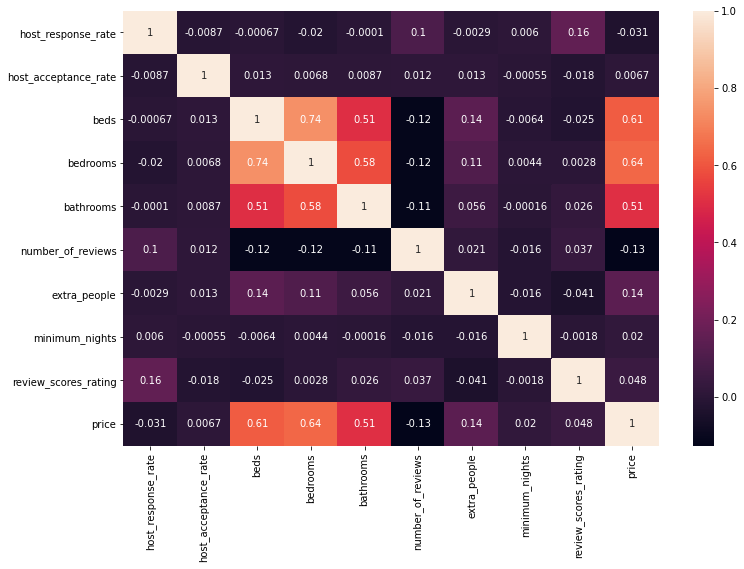

In [20]:
#using heatmap to see
plt.figure(figsize=(12,8))
sns.heatmap(df_listings1.corr(), annot=True,);

### From the heat map we see that the beds, bedrooms, bathrooms number affect the price most. 

In [ ]:
## preparing data for modeling 

In [23]:
# waht are the categories data
df_listings1.select_dtypes(include=['object']).columns

Index(['city', 'host_is_superhost', 'neighbourhood', 'room_type',
       'property_type', 'bed_type'],
      dtype='object')

In [24]:
# make a dataframe for dummy
dummy_column=df_listings1.select_dtypes(include=['object']).columns
dummy_cat=pd.get_dummies(df_listings1[dummy_column])

In [25]:
#create my final prediction dataset with dummy dataset and the orignal dataset
df_final=pd.concat([df_listings1,dummy_cat],axis=1)
df_final.shape

(2404, 123)

In [26]:
#dropping the catagory columns 
df_final=df_final.drop(df_final[dummy_column],axis=1)

In [28]:
#create x for variables and y for prediction 
x=df_final.drop('price',axis=1)
y=df_final['price']

In [32]:
# build the models 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
m_model = linear_model.LinearRegression()
m_model.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [33]:
# checking the score of the model 
print(r2_score(y_train, m_model.predict(X_train))) 
print(mean_squared_error(y_train, m_model.predict(X_train)))

0.6392014784153555
2546.5441547873875
